# Titanic data EDA and Prediction

**Data description**

Here we have 12 columns-

**PassengerId** : ID of Passenger

**Pclass** : Passenger class (1=1st,2=2nd,3=3rd)

**Survived** : Survival (0=No,1=Yes)

**Sex** : sex(male & female)

**Name** : name of passengers

**Age** : age of passengers

**Sibsp** : Number of Siblings

**Parch** : Number of Parents

**Ticket** : passenger ticket number

**Fare** : Passenger fare(British pound)

**Cabin** : cabin

**Embarked** : Port of Embarkation(C=Cherbourg ,Q=Queenstown, S=Southamption)





In [1]:
#importing usefull lib

import numpy as np
import pandas as pd
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#reading the data using pandas read_csv. 
#It's ofthen used pandas fuction to read csc file.
import pandas as pd
df1=pd.read_csv("../input/titanic/train.csv")
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#checking shape of data frame
df1.shape

(891, 12)

In [4]:
#here we check mean,std,quantiles value using pandas describe function
df1.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
#extracting all columns from the data frame for forother uses
df1.columns.tolist()


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
#count NA values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#dropng unrelated column
#here we going to drop cabin bcz it's have lots of nan vales
#here is nothing use in traing og passenger id so simply we drop it using pandas drop()
df=df1.drop(["PassengerId","Ticket","Cabin"],axis=1)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  71.2833        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S

In [8]:
#filing NA values
#here we filling na values by mean() for numerical values 
#and mode() for categorical 
df["Age"].fillna(df["Age"].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Exploratory Data Analysis

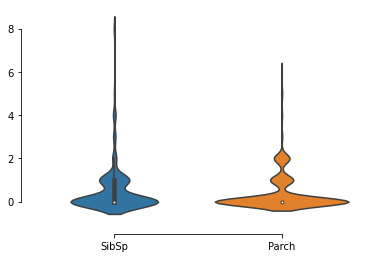

In [10]:

#here wr checking outliers 
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,5:7])
sns.despine(offset=10,trim=True)

<AxesSubplot:>

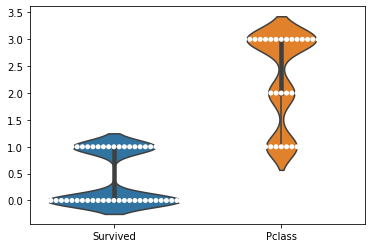

In [11]:
f,ax=plt.subplots()
sns.violinplot(data=df.iloc[:,0:2])
#sns.despine(offset=10,trim=True)
sns.swarmplot(data=df.iloc[:,0:2],color="white")


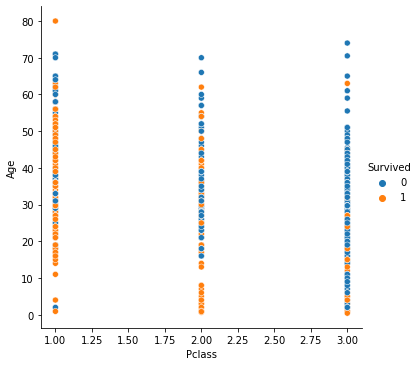

In [12]:
#here we going to ploat scaterplot to see data distirbution
sns.relplot(x="Pclass",y="Age",hue="Survived",data=df);

In [13]:
#visualisation how many pasanger survived and how many dead
#here we creat a function for bar_chart 
#for avoiding write same code for defrent columns

def bar_chart(column):
    survived=df[df["Survived"]==1][column].value_counts()
    dead=df[df["Survived"]==0][column].value_counts()
    df1=pd.DataFrame([survived,dead])
    df1.index=["Survived","Dead"]
    df1.plot(kind="bar",figsize=(10,5))

In [14]:
#here we make a bar chart on sex column
#for checking how many male & female
bar_chart("Sex")

**In the above chart we can essly analyse that females have more chance to survived.**

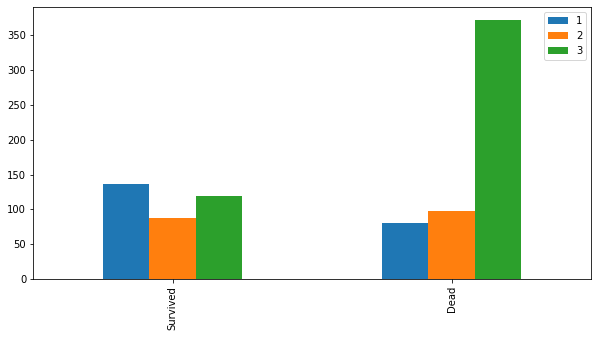

In [15]:
#here we going to make bar char on Pclass
bar_chart("Pclass")

**by the above chart on Pclass we can say that 1st class passenger have more chance to survived**

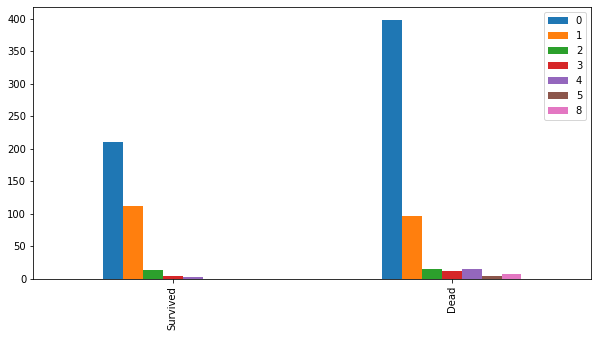

In [16]:
#here we going to make bar chart on sibsp
bar_chart("SibSp")

**by above chart we can analyes that there is more chance to survivrd those who have 0 or 1 siblings**

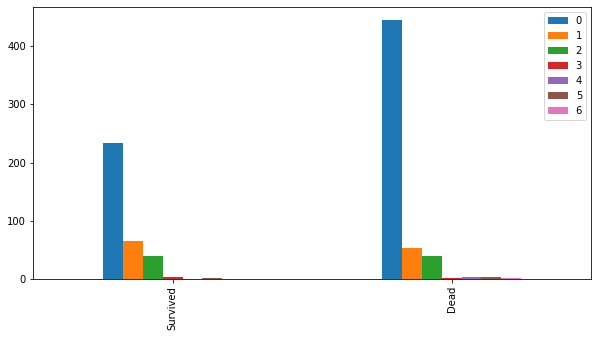

In [17]:
bar_chart("Parch")

In [18]:
bar_chart("Embarked")

**by the above chart we can say that there are more chance to survived for those who bord from Southamption**

**Passenger traveilling from Cherbourg port survived more than other port passenger**

**Dedacting outliers and removing them**

In [19]:
#visualisation data on boxplot to see the outliers
def box_plot(column):
    df.boxplot(by="Survived",column=[column],grid=True)



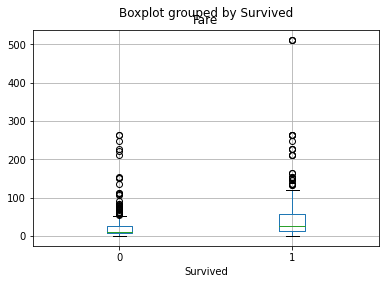

In [20]:
box_plot("Fare")

here we can see outliers above the 100 we can considerd them as outlier

In [21]:
#checking outliers on Sibsp column
box_plot("SibSp")

by above chart we consider more then 5 siblings as outlierS

In [22]:
#ploting pair plot
g=sns.PairGrid(df,hue="Survived")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x7f6340f05490>>

In [23]:
#by value_counts we can see total unique values
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
#here we chacking largest values row on column Sibsp
df.nlargest(12,["SibSp"])

Survived  Pclass                                Name     Sex        Age  \
159         0       3          Sage, Master. Thomas Henry    male  29.699118   
180         0       3        Sage, Miss. Constance Gladys  female  29.699118   
201         0       3                 Sage, Mr. Frederick    male  29.699118   
324         0       3            Sage, Mr. George John Jr    male  29.699118   
792         0       3             Sage, Miss. Stella Anna  female  29.699118   
846         0       3            Sage, Mr. Douglas Bullen    male  29.699118   
863         0       3   Sage, Miss. Dorothy Edith "Dolly"  female  29.699118   
59          0       3  Goodwin, Master. William Frederick    male  11.000000   
71          0       3          Goodwin, Miss. Lillian Amy  female  16.000000   
386         0       3     Goodwin, Master. Sidney Leonard    male   1.000000   
480         0       3      Goodwin, Master. Harold Victor    male   9.000000   
683         0       3         Goodwin, Mr. Charles Edward    male  14.000000   

     SibSp  Parch   Fare Embarked  
159      8      2  69.55        S  
180      8      2  69.55        S  
201      8      2  69.55        S  
324      8      2  69.55        S  
792      8      2  69.55        S  
846      8      2  69.55        S  
863      8      2  69.55        S  
59       5      2  46.90        S  
71       5      2  46.90        S  
386      5      2  46.90        S  
480      5      2  46.90        S  
683      5      2  46.90        S

In [25]:
#now we gpoing to remove outliers
df=df.drop([159,180,201,324,792,846,863])
df.shape


(884, 9)

In [26]:
#here we going to check outliers on parch
box_plot("Parch")

In [27]:
df["Parch"].value_counts()

0    678
1    118
2     73
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
df.nlargest(12,["Parch"])

Survived  Pclass                                               Name  \
678         0       3            Goodwin, Mrs. Frederick (Augusta Tyler)   
13          0       3                        Andersson, Mr. Anders Johan   
25          1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
610         0       3  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
638         0       3             Panula, Mrs. Juha (Maria Emilia Ojala)   
885         0       3               Rice, Mrs. William (Margaret Norton)   
167         0       3    Skoog, Mrs. William (Anna Bernhardina Karlsson)   
360         0       3                                 Skoog, Mr. Wilhelm   
438         0       1                                  Fortune, Mr. Mark   
567         0       3        Palsson, Mrs. Nils (Alma Cornelia Berglund)   
86          0       3                             Ford, Mr. William Neal   
437         1       2              Richards, Mrs. Sidney (Emily Hocking)   

        Sex   Age  SibSp  Parch      Fare Embarked  
678  female  43.0      1      6   46.9000        S  
13     male  39.0      1      5   31.2750        S  
25   female  38.0      1      5   31.3875        S  
610  female  39.0      1      5   31.2750        S  
638  female  41.0      0      5   39.6875        S  
885  female  39.0      0      5   29.1250        Q  
167  female  45.0      1      4   27.9000        S  
360    male  40.0      1      4   27.9000        S  
438    male  64.0      1      4  263.0000        S  
567  female  29.0      0      4   21.0750        S  
86     male  16.0      1      3   34.3750        S  
437  female  24.0      2      3   18.7500        S

In [29]:
df=df.drop([678])
df.shape


(883, 9)

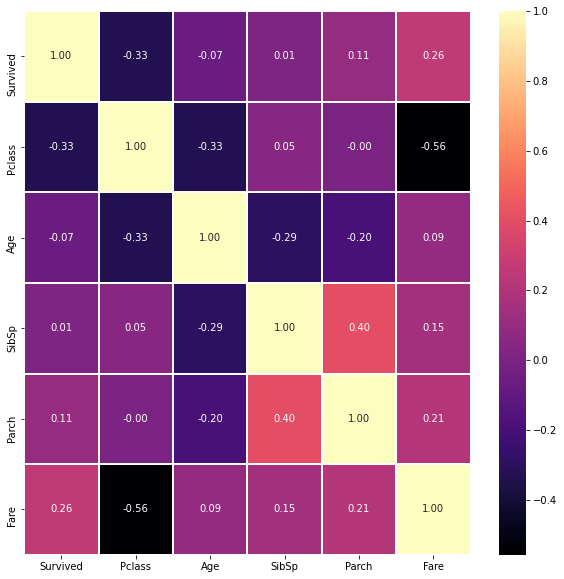

In [30]:
#here we going to drow heatmap to check co relation between columns 

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

**Frome EDA we got**
* Cabin column have lots of null values so we drop it,
* Ticket and paddenger Id is not usefull and does not have impact on survivl so drop it.
* Passenger travelling in higher class have more chance to survived
* Females survived more then Males.
* In the 1st class Females were more then Males it is also a resion that females have more chance to survived.
* Passenger travelling with siblings ,parents have more chance to survived.
* Passenger traveilling from Cherbourg port survived more than other port passenger.


In [31]:
#droping an relevant columns
#dividing data X(features) and Y(outcome)
X=df.drop(["Fare","Survived","Name"],axis=True)
y=df["Survived"]

In [32]:
print(X.shape)
print(y.shape)

(883, 6)
(883,)


In [33]:
X.head()

Pclass     Sex   Age  SibSp  Parch Embarked
0       3    male  22.0      1      0        S
1       1  female  38.0      1      0        C
2       3  female  26.0      0      0        S
3       1  female  35.0      1      0        S
4       3    male  35.0      0      0        S